<div class="alert alert-block alert-success">
    <h1 style="margin-bottom:0.5cm"><b>Final Master Thesis</b></h1>
    <p style="margin-bottom:0.25cm">Course 2024-2025: <b>Machine Learning study using Common Spatial Patterns (CSP) </b>
    <br>
        Master in Neuroengineering and Rehabilitation</p>
    <b>Director Joan F. Alonso</b>
    <br>
    <b>Cootutor Andres El-Fakdi Sencianes</b>
    <br>
    <b> Student. Ferran Franco<b>
    <br>
    <br>
</div>

<div class="alert alert-info" role="alert", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:20px">Features description</h2>
</div>


**Common Spatial Patterns (CSP)** is a signal processing technique used to extract features from EEG data, specifically for distinguishing between two conditions or mental states. CSP works by finding spatial filters that maximize the variance for one class while minimizing it for the other. The filters are derived from the covariance matrices of the EEG signals and are applied to transform the data into a low-dimensional feature space. [1] [2] [3] [4] [5] 

**How It Works:**

Input Data: EEG signals from multiple channels.
Covariance Calculation: Compute covariance matrices for each class.
Decomposition: Solve a generalized eigenvalue problem to obtain spatial filters.
Feature Extraction: Project EEG signals through the filters to create features representing class-specific variance.
Selection: Select the most discriminative CSP features, typically the top and bottom few.

**Application:**

CSP is widely used in Brain-Computer Interface (BCI) systems, particularly for motor imagery tasks. It helps in classifying mental states like imagining left-hand versus right-hand movements, which is crucial for controlling assistive devices like robotic arms or communication systems for individuals with motor impairments.

**Strengths:**

Effective for binary classification problems with distinct spatial patterns in the EEG.
Provides interpretable spatial filters that highlight the brain regions involved in the task.

**Limitations:**

Sensitive to noise and artifacts; requires pre-processing steps like artifact removal and band-pass filtering.
Performance may degrade for multiclass problems without modification or extension (e.g., One-vs-Rest CSP).

**Practical Use:**

In practice, CSP is often combined with machine learning classifiers (e.g., Support Vector Machines or Logistic Regression) to build robust predictive models for classifying brain states. Its interpretability makes it valuable in neuroscience research for identifying neural correlates of specific tasks or conditions.

<div class="alert alert-info" role="alert", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:20px">Data loading</h2>
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = r"C:\Users\Ferran\Desktop\TFM\TFM_EEG\DATASET\MI\SUB_2\CSP\csp_features_labels.parquet"
# Load the Parquet file
data = pd.read_parquet(file_path)

# Display the first few rows of the DataFrame
data


,0,1,2,3,labels
0,-8.970207,-5.814102,-1.600872,-3.990032,0
1,-8.459289,-6.881226,-0.962808,-3.042766,0
2,-7.268999,-7.202267,-0.570675,-2.788602,0
3,-7.548785,-8.008479,-0.473971,-2.247260,0
4,-7.978503,-6.571970,-0.217777,-1.962889,0
...,...,...,...,...,...
526,-5.309855,1.281223,-5.351755,-4.172692,1
527,-6.185504,1.341524,-5.214622,-3.978218,1
528,-5.839715,1.418595,-5.264759,-3.375307,1
529,-5.816517,1.482668,-5.282015,-3.439323,1


In [3]:
# ADDED CODE WHEN WORKING WITH 4 FEATURES

# Combine features into a single column
data['features'] = data[['0', '1', '2', '3']].values.tolist()

# Drop the individual feature columns
data.drop(columns=['0', '1', '2', '3'], inplace=True)

# Reorder columns so 'features' comes before 'labels'
data = data[['features', 'labels']]

# Check the resulting DataFrame
print(data.head())


                                            features  labels
0  [-8.970206963099939, -5.814101732578316, -1.60...       0
1  [-8.459288841843614, -6.881225587150367, -0.96...       0
2  [-7.268998690257758, -7.2022669476013315, -0.5...       0
3  [-7.548785336588372, -8.00847867370834, -0.473...       0
4  [-7.978503499265263, -6.571970018211304, -0.21...       0


In [4]:
# Flatten and handle inconsistent lengths
# Assume the features are 2D or nested; we need to flatten them
X = [np.ravel(feature) for feature in data['features']]


# Find the maximum length of the flattened features
max_length = max(len(x) for x in X)

# Pad all feature arrays to the maximum length
X_padded = np.array([np.pad(x, (0, max_length - len(x)), mode='constant') for x in X])

# Extract labels
y = data['labels']


In [5]:
# Flatten each nested array within X_padded
X_flattened = np.array([np.hstack(sample) for sample in X_padded])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

print("Normalized features shape:", X_scaled.shape)

Normalized features shape: (531, 4)


In [6]:

print("Shape of X_flattened:", X_flattened.shape)
print("Example flattened element:", X_flattened[0])

print("Shape of X_scaled:", X_scaled.shape)
print("Example normalized element:", X_scaled[0])


Shape of X_flattened: (531, 4)
Example flattened element: [-8.97020696 -5.81410173 -1.60087189 -3.99003178]
Shape of X_scaled: (531, 4)
Example normalized element: [-1.39880571 -0.70962219  0.68889423 -0.30287675]


<div class="alert alert-info" role="alert", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:20px">Training</h2>
</div>


In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

In [8]:
# Initialize the KNN model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("KNN Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

KNN Evaluation Metrics:
Accuracy: 0.9953051643192489
Precision: 0.9893617021276596
Recall: 1.0
ROC AUC: 0.9958333333333333


<div class="alert alert-info" role="alert", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:20px">Validation</h2>
</div>


In [9]:
# Load the Parquet file
validation_path = r"C:\Users\Ferran\Desktop\TFM\TFM_EEG\DATASET\MI\SUB_2\CSP\Validation\csp_features_labels_validation.parquet"
validation_data = pd.read_parquet(validation_path)

# Display the first few rows of the DataFrame
validation_data

,0,1,2,3,labels
0,-1.865710,-0.581028,-1.404227,-2.259686,0
1,-3.938655,-0.290648,0.022313,-1.867312,0
2,-1.522297,-0.185051,-0.663755,-1.622028,0
3,-2.456481,0.465369,-1.577273,-1.419020,0
4,-1.144619,0.340678,-2.581693,-0.672561,0
...,...,...,...,...,...
235,-0.625473,-3.737695,-0.465147,-0.385898,1
236,-0.026311,-4.756718,-1.793464,-0.072237,1
237,0.661567,-4.479449,-3.114451,-0.627392,1
238,0.998966,-3.650153,-3.745219,-1.088343,1


In [10]:
# Count the occurrences of each value in the 'side' column
side_counts = validation_data['labels'].value_counts()

print("Counts of rows for each side:")
print(side_counts)

Counts of rows for each side:
labels
0    120
1    120
Name: count, dtype: int64


There are the same number of instances of right and left, this means that the validation dataset is equilibrated

In [11]:
def evaluate_model(model, X, y, label_encoder=None, model_name="Model"):
    """
    Trains, evaluates, and visualizes the performance of a classification model.

    Parameters:
    - model: A scikit-learn compatible classification model (e.g., DecisionTreeClassifier).
    - X: Feature matrix (Pandas DataFrame or NumPy array).
    - y: Target vector (Pandas Series or NumPy array).
    - label_encoder: An optional LabelEncoder object for decoding labels. Required for visualization.
    - model_name: A string representing the name of the model (e.g., "KNN", "Decision Tree").

    Returns:
    - metrics: A dictionary containing evaluation metrics (accuracy, precision, recall, roc_auc).
    """
    # Ensure X is flattened if necessary
    if isinstance(X, pd.DataFrame) or isinstance(X, np.ndarray):
        if X.ndim == 1 or any(isinstance(row, (list, np.ndarray)) for row in X):
            X = np.array([np.hstack(sample) if isinstance(sample, (list, np.ndarray)) else sample for sample in X])
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Train the model
    model.fit(X_imputed, y)

    # Predict on the dataset
    y_pred = model.predict(X_imputed)
    y_pred_proba = model.predict_proba(X_imputed)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y, y_pred_proba) if y_pred_proba is not None else None

    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc,
    }

    # Print metrics
    print(f"{model_name} Evaluation Metrics:")
    for key, value in metrics.items():
        print(f"{key.capitalize()}: {value:.4f}" if value is not None else f"{key.capitalize()}: N/A")

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_ if label_encoder else None)
    cm_display.plot()
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # Classification Report Heatmap
    report = classification_report(y, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGn", fmt=".2f", cbar=True)
    plt.title(f"{model_name} Classification Report")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    return metrics


In [12]:
# ADDED CODE WHEN WORKING WITH 4 FEATURES

# Combine features into a single column
validation_data['features'] = validation_data[['0', '1', '2', '3']].values.tolist()

# Drop the individual feature columns
validation_data.drop(columns=['0', '1', '2', '3'], inplace=True)

# Reorder columns so 'features' comes before 'labels'
validation_data = validation_data[['features', 'labels']]

# Check the resulting DataFrame
print(validation_data.head())


                                            features  labels
0  [-1.8657101644767542, -0.5810279888791472, -1....       0
1  [-3.9386550445071657, -0.2906482360478181, 0.0...       0
2  [-1.5222966493155936, -0.18505078797703572, -0...       0
3  [-2.456480809898026, 0.46536921694824634, -1.5...       0
4  [-1.144618732400121, 0.34067842699034045, -2.5...       0


In [13]:
# Flatten and handle inconsistent lengths
# Assume the features are 2D or nested; we need to flatten them
X_val = [np.ravel(feature) for feature in validation_data['features']]


# Find the maximum length of the flattened features
max_length_val = max(len(x) for x in X_val)

# Pad all feature arrays to the maximum length
X_padded_val = np.array([np.pad(x, (0, max_length_val - len(x)), mode='constant') for x in X_val])

# Extract labels and encode
y = validation_data['labels']
label_encoder = LabelEncoder()
y_validation_encoded = label_encoder.fit_transform(y)

# Flatten each nested array within X_padded
X_flattened_val = np.array([np.hstack(sample) for sample in X_padded_val])

scaler_val = StandardScaler()
X_scaled_val = scaler_val.fit_transform(X_flattened_val)

print("Normalized features shape:", X_scaled_val.shape)


Normalized features shape: (240, 4)


## DECISION TREE

Decision Tree Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC: 1.0
Decision Tree Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Roc_auc: 1.0000


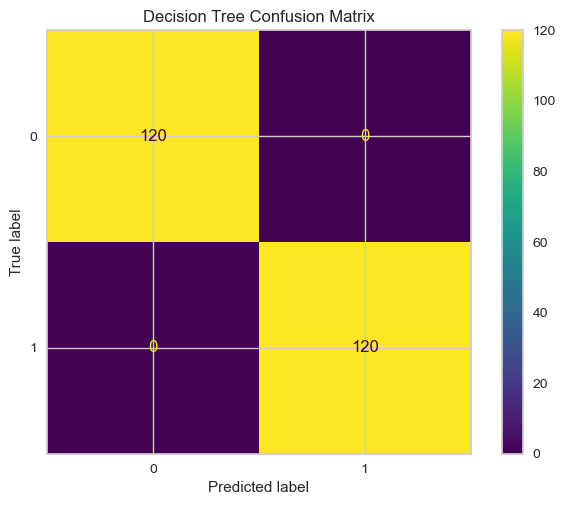

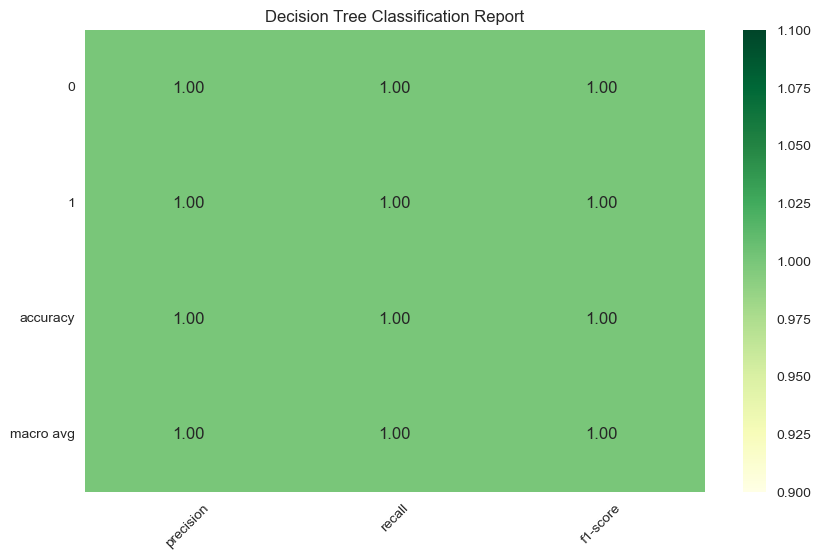

In [14]:
# Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_scaled_val, y_validation_encoded)

# Predict and evaluate
y_pred = dt.predict(X_scaled_val)
y_pred_proba = dt.predict_proba(X_scaled_val)[:, 1]

accuracy = accuracy_score(y_validation_encoded, y_pred)
precision = precision_score(y_validation_encoded, y_pred)
recall = recall_score(y_validation_encoded, y_pred)
roc_auc = roc_auc_score(y_validation_encoded, y_pred_proba)

print(f"Decision Tree Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

dt_metrics = evaluate_model(dt, X_scaled_val, y_validation_encoded, label_encoder, model_name="Decision Tree")


## KNN

KNN Evaluation Metrics:
Accuracy: 0.7333333333333333
Precision: 0.7258064516129032
Recall: 0.75
ROC AUC: 0.8056249999999999
KNN Evaluation:
KNN Evaluation Metrics:
Accuracy: 0.7333
Precision: 0.7258
Recall: 0.7500
Roc_auc: 0.8056


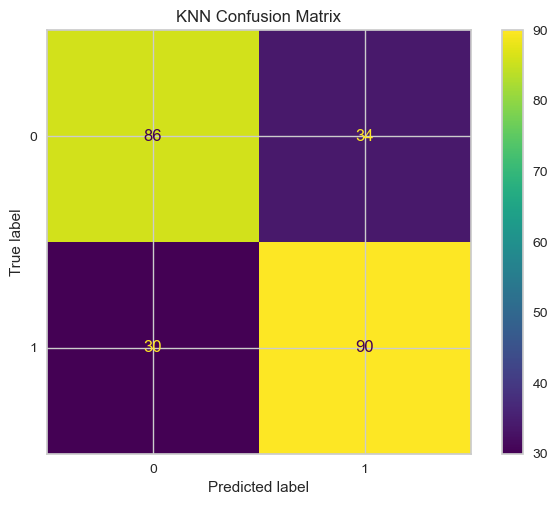

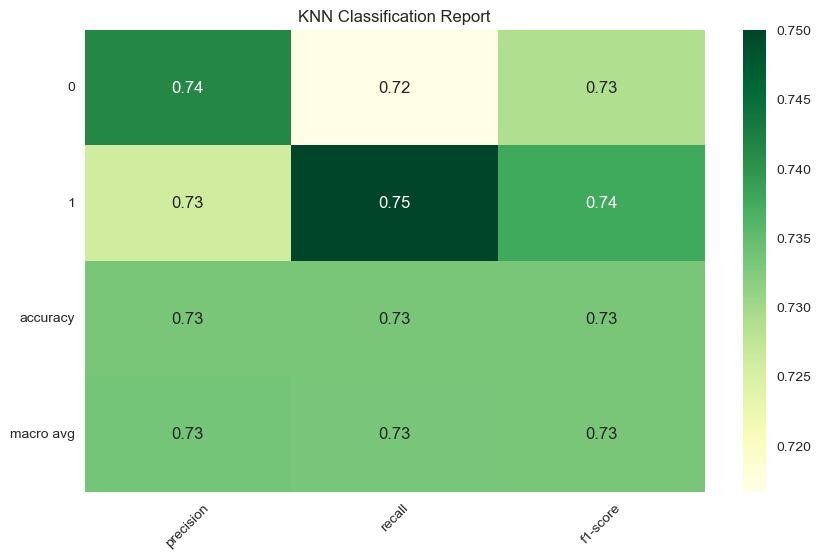

In [15]:
# K-Nearest Neighbors Classifier (KNN)
knn = KNeighborsClassifier(n_neighbors=3)

# Train KNN model
knn.fit(X_scaled_val, y_validation_encoded)

# Predict on the validation set
y_pred_knn = knn.predict(X_scaled_val)
y_pred_proba_knn = knn.predict_proba(X_scaled_val)[:, 1]  # Probability of class 1

# Evaluation metrics for KNN
accuracy_knn = accuracy_score(y_validation_encoded, y_pred_knn)
precision_knn = precision_score(y_validation_encoded, y_pred_knn)
recall_knn = recall_score(y_validation_encoded, y_pred_knn)
roc_auc_knn = roc_auc_score(y_validation_encoded, y_pred_proba_knn)

# Print evaluation metrics for KNN
print(f"KNN Evaluation Metrics:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"ROC AUC: {roc_auc_knn}")

# Evaluate KNN using evaluate_model
print("KNN Evaluation:")
knn_metrics = evaluate_model(knn, X_scaled_val, y_validation_encoded, label_encoder, model_name="KNN")


In [16]:
# Example: Save model with joblib or Pickle
import joblib
joblib.dump(knn, 'trained_model_CSP.pkl')


['trained_model_CSP.pkl']

<div class="alert alert-info" role="alert", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:20px">References</h2>
</div>

[1]	Khan J, Bhatti MH, Khan UG, Iqbal R. Multiclass EEG motor-imagery classification with sub-band common spatial patterns. EURASIP J Wirel Commun Netw [Internet]. 2019;2019(1). Available from: http://dx.doi.org/10.1186/s13638-019-1497-y
 	 
[2]	Saibene A, Caglioni M, Corchs S, Gasparini F. EEG-based BCIs on motor imagery paradigm using wearable technologies: A systematic review. Sensors (Basel) [Internet]. 2023;23(5):2798. Available from: https://www.mdpi.com/1424-8220/23/5/2798
 	 
[3]	Wang Y, Gao S, Gao X. Common spatial pattern method for channel selelction in motor imagery based brain-computer interface. In: 2005 IEEE Engineering in Medicine and Biology 27th Annual Conference. IEEE; 2005. p. 5392–5.
 	 
[4]	Omari S, Omari A, Abderrahim M. Multiple tangent space projection for motor imagery EEG classification. Appl Intell [Internet]. 2023;53(18):21192–200. Available from: http://dx.doi.org/10.1007/s10489-023-04551-2
 	 
[5]	Casso M-I, Jeunet C, Roy RN. Heading for motor imagery brain-computer interfaces (MI-BCIs) usable out-of-the-lab: Impact of dry electrode setup on classification accuracy. In: 2021 10th International IEEE/EMBS Conference on Neural Engineering (NER). IEEE; 2021. p. 690–3.
 	 
